In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`````{admonition} Interactive Python Page
:class: tip, dropdown

The code on this page can be used interactively: click {fa}`rocket` --> {guilabel}`Live Code` in the top right corner, then wait until the message {guilabel}`Python interaction ready!` appears.

When this page is activated:
- Several packages will be imported automatically
- Code cells will **not** be executed automatically (you do it!)

````{admonition} Which packages are imported when this page is activated?
:class: note, dropdown
```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
```
````
`````

# Modelling exercise 1: Linear Reservoir

## Introduction

In this exercise we are considering a simple reservoir as shown below. 

![image.png](figures/reservoir.png)

The behavior of this reservoir is defined by the mass balance equation:

$$
\begin{equation}
\Delta S = P - E - Q
\end{equation}
$$

$P$ and $E$ represent precipitation and the actual evaporation respectively. $S$ is the storage in the reservoir. The discharge $Q$ in the reservoir can be expressed as a function of stored water in the reservoir:

$$
\begin{equation}
Q = f\left(S\right)
\end{equation}
$$


## 1. Linear Reservoir without External Drivers

At first we will consider the reservoir without the external drivers ```P``` and ```E``` and we assume that Q is equal to:

$$
\begin{equation}
Q = k S ^\alpha
\end{equation}
$$

Next to this, we also assmume a linear reservoir, so $\alpha$ is equal to 1.

With these assumptions, the system can be solved analytically. This makes it possible to calculate the storage and discharge at any time by knowing the initial condition and the ```k``` value.

### Part 1

Derive the analytical solution of the reservoir, as mentioned without the external drivers and as a **linear** reservoir. 

However, for hydrological systems it is not realistic to neglect the external drivers. If we take into account these drivers, the equation cannot be solved analytically, but has to be solved numerically.

An simple example of a numerical solution is the explicit forward Euler method. This method calculates the state of a system at each time step considering the state of the system at the previous time step and rate of changes:

$$
\begin{equation}
S(t + \Delta t) = F(S(t))
\end{equation}
$$

If we consider the linear reservoir problem without the external drivers, we obtain:

$$
\begin{equation}
\frac{dS(t)}{dt} = -k S(t) ^\alpha
\end{equation}
$$

The forward Euler method yields:

$$
\begin{equation}
\frac{S(t + \Delta t) - S(t)}{\Delta t} = -kS(t)^\alpha
\end{equation}
$$

This results in the numerical solution:

$$
\begin{equation}
S(t + \Delta t) = S(t) + -  \Delta t k  S(t) ^\alpha
\end{equation}
$$

Hence, if $ S(t) $ is known, $ S(t + \Delta t) $ can be calculated in one iteration. The big assumption in the forward Euler model is that $ S\left(t\right) $ is relatively constant during the timestep. This may not always be true. If $S\left(t\right)$ changes fast smaller timesteps need to be used to not make too big of an error. Other, more complicated methods to numerically solve differential equations exist such as Runga-Kutta. See the material of the MUDE course for more information on those. In hydrology it is always important to weigh if the error introduced by your numerical scheme is significant compared to the error introduced by the fact that the model is not perfect to begin with.

### Part 2

Write the functions in the code cells below to calculate the analytical and numerical solution of the linear reservoir problem without external drivers. Return for both the storage array ```S```and the time array ```t```.

The following (starting) values can be used; during the exercise, you can change $ k $ and $ t_{max} $:

- $ S_0 = 75 $ mm
- $ k = 0.01 $ d$^{-1}$
- $ t_0 = 0 $ days
- $ t_{max} = 200 $ days

The following questions might help you write the script:

1. What do you want to calculate?
2. Which variables need to be defined?
3. For how many time steps do you want to calculate the output?
4. How can a for loop help you to calculate the output for multiple time steps (search in help)?
5. How can you use a function for this exercise?

In [3]:
S_0 = 75  # mm
k = 0.01  # per day
t_0 = 0  # day
t_max = 200  # days
dt = 10  # day(s)
alpha = 1 

In [4]:
def analytical_solve(k, t_max, t_0, t, S_0):
    S = np.zeros(len(t))
    S[0] = S_0
    for i in range(1, len(t)):
        S[i] = S_0*np.exp(-k*(t[i]-t_0))
    return S

In [ ]:
def numerical_solve(t, t_max, dt,k, S_0):
    S = np.zeros(len(t))
    S[0] = S_0
    for i in range(1, len(t)):
        S[i] = S[i-1] - dt*k*S[i-1]
    return S

In [6]:
t = np.arange(t_0, t_max+1, dt)
S_anal = analytical_solve(k, t_max, t_0, t, S_0)
S_num = numerical_solve(t, t_max, dt, k, S_0)
print(S_anal)


[75.         67.86280635 61.40480648 55.56136655 50.27400345 45.48979948
 41.16087271 37.24389778 33.69967231 30.49272448 27.59095809 24.96533128
 22.58956589 20.43988448 18.4947723  16.73476201 15.14223885 13.7012643
 12.39741662 11.21764644 10.15014624]


In [7]:
print(S_num)

[75.         67.5        60.75       54.675      49.2075     44.28675
 39.858075   35.8722675  32.28504075 29.05653668 26.15088301 23.53579471
 21.18221524 19.06399371 17.15759434 15.44183491 13.89765142 12.50788627
 11.25709765 10.13138788  9.11824909]


### Part 3


Compute the analytical and numerical solution, both using the same values for the parameters. Plot the solutions on a single graph and see if there are any differences. 
Try alternating the values for the timestep ```dt``` and the ```k``` values to investigate their influence. Observe how the solutions compare to each other.

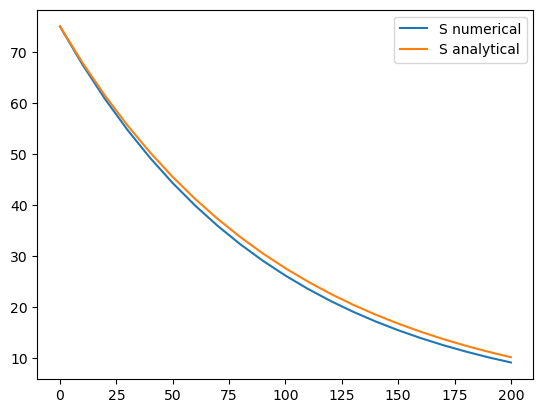

In [8]:
# Part 3
plt.plot(t,S_num, label = 'S numerical')
plt.plot(t, S_anal, label= 'S analytical')
plt.legend()


## 2. Linear Reservoir with External Drivers

Until now we considered a model of linear reservoir without the external drivers. While in practice, hydrological models tend to mimic the interactions of the system with external drivers. 
Therefore, as mentioned earlier, neglecting the external drivers is not realistic. 
In the last part of this exercise, you will conside external drivers. This water balance equation cannot be solved analytically because precipitation and evaporation cannot be formulated; therefore, we only rely on numerical analysis.

### Part 4

Write a script in the code cell below to calculate the numerical solution of the linear reservoir problem **including** the external drivers (see the model structure in the figure). The values for precipitation and evaporation are given in [P_PE_date.txt](P_PE_date.txt). Have a look at this file and think about which values represents the precipitation and potential evaporation. 

You can use the same values as in the previous part of the assignment for the other variables.


In [ ]:
# Part 4
filename = 'P_PE_date.txt'
data = pd.read_csv(filename, delim_whitespace=True)
data.columns = ['Year', 'Month', 'Day', 'Precipitation', 'Evaporation']
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data = data.set_index('Date')
data = data.drop(columns=['Year', 'Month', 'Day'])

C:\Users\margh\AppData\Local\Temp\ipykernel_28800\3521441846.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True)


,Precipitation,Evaporation
Date,,
2001-10-02,0.290746,1.929183
2001-10-03,22.964954,1.562004
2001-10-04,0.000000,1.278364
2001-10-05,0.011281,1.194978
2001-10-06,12.485150,1.462382
...,...,...
2003-07-27,1.578533,3.666115
2003-07-28,0.011281,3.200935
2003-07-29,0.011281,3.379298


In [57]:
def numerical_solve_1(t, t_max, dt, k, E, P, S_0):
    S = np.zeros(len(t))
    S[0] = S_0
    for i in range(1, len(t)):
        S[i] = S[i-1]*(1-k*dt) + (P[i] - E[i])*dt
    return S

In [58]:
P = data['Precipitation'].values
E = data['Evaporation'].values
dt_1 = 1
k=0.1
t_max_1 = len(data) - 1
t_0_1 = 0
t_1 = np.arange(t_0_1, t_max_1 + 1, dt_1)

S_num = numerical_solve_1(t_1, t_max_1, dt_1, k, E, P, 0)


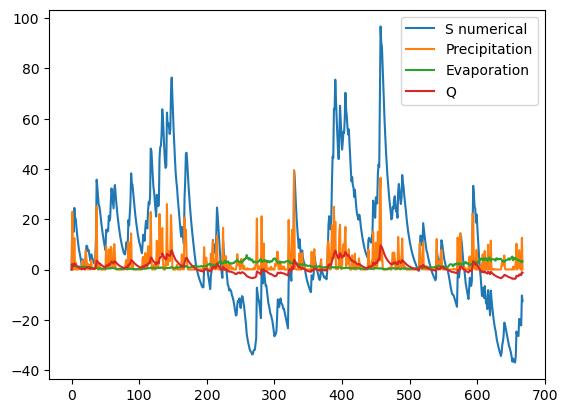

In [59]:
plt.plot(t_1, S_num, label = 'S numerical ')
plt.plot(t_1, data['Precipitation'].values, label = 'Precipitation')
plt.plot(t_1, data['Evaporation'].values, label = 'Evaporation')
plt.plot(t_1, k*S_num, label = 'Q')
plt.legend()


### Bonus Question

The average runoff coefficient ܳ$\bar{Q}$/$\bar{P}$ of this catchment is between 0.3 and 0.35. Try to change the values of the parameters k and $\alpha$ in such a way that your modelled runoff coefficient is between 0.3 and 0.35 as well. Do not forget to plot the hydrograph and be careful to have a reasonable hydrograph as well.

In [ ]:
# Bonus